<a href="https://colab.research.google.com/github/arn97/MLTSA25_ARoy/blob/main/MLTSA_ARoy/HW3_ARoy_ARIMA_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import pylab as pl
import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
import json
import os

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

TASK 1: data ingestion

TASK 2: data exploration

TASK 3: test each time series for stationarity

TASK 4: Inspect the partial autocorrelation with plots

TASK 5: fit an ARIMA model to each time series with appriopriate parameters

# REMEMBER: CAPTIONS FOR EVERY PLOT!!!

#  TASK 1: data ingestion

In [ ]:
# download kaggle economic data
# https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/data#a.us.txt


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content

/content


In [ ]:
ls

gdrive/  sample_data/


In [ ]:
cd /content/gdrive/MyDrive/.kaggle

/content/gdrive/MyDrive/.kaggle


In [ ]:
ls

kaggle.json


In [ ]:
ls kaggle.json


kaggle.json


In [ ]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']


## now make a director to save the MLTSA 2025 data into - call it MLTSA25

In [ ]:
!mkdir /content/gdrive/MyDrive/MLTSA25

In [ ]:
cd /content/gdrive/MyDrive/MLTSA25

/content/gdrive/MyDrive/MLTSA25


## make a HW3 folder

In [ ]:
!mkdir HW3

In [ ]:
cd HW3

/content/gdrive/MyDrive/MLTSA25/HW3


## download the kaggle data _note: you may need to go to the specificl challenge and agree to the terms of competition_

In [ ]:
!kaggle datasets download borismarjanovic/price-volume-data-for-all-us-stocks-etfs

Dataset URL: https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs
License(s): CC0-1.0
100% 491M/492M [00:11<00:00, 30.2MB/s]
100% 492M/492M [00:11<00:00, 44.9MB/s]


In [ ]:
!ls

price-volume-data-for-all-us-stocks-etfs.zip


## uncompress the file

In [ ]:
!unzip price-volume-data-for-all-us-stocks-etfs.zip

Streaming output truncated to the last 5000 lines.
  inflating: Stocks/ergf.us.txt      
  inflating: Stocks/erh.us.txt       
  inflating: Stocks/eri.us.txt       
  inflating: Stocks/eric.us.txt      
  inflating: Stocks/erie.us.txt      
  inflating: Stocks/erii.us.txt      
  inflating: Stocks/erj.us.txt       
  inflating: Stocks/erm.us.txt       
  inflating: Stocks/ern.us.txt       
  inflating: Stocks/eros.us.txt      
  inflating: Stocks/eryp.us.txt      
  inflating: Stocks/es.us.txt        
  inflating: Stocks/esba.us.txt      
  inflating: Stocks/esbk.us.txt      
  inflating: Stocks/esca.us.txt      
  inflating: Stocks/esdi.us.txt      
  inflating: Stocks/esdiw.us.txt     
  inflating: Stocks/ese.us.txt       
  inflating: Stocks/esea.us.txt      
  inflating: Stocks/eses.us.txt      
  inflating: Stocks/esg.us.txt       
  inflating: Stocks/esgd.us.txt      
  inflating: Stocks/esge.us.txt      
  inflating: Stocks/esgf.us.txt      
  inflating: Stocks/esgg.us.txt      

In [71]:
# use glob to sort the files alphabetically
alltss = []

allfiles = np.sort(np.array(glob.glob("Data/Stocks/*.txt")))
tss = pd.read_csv(allfiles[0])[["Date", "Close"]].rename({"Close":
              allfiles[0].replace(".txt",
                                  "").replace("Data/Stocks/",
                                              "")}, axis=1)
for f in allfiles[1:11]:
    print(f)
    name = f.replace(".txt","").replace("Data/Stocks/", "")

    tss = tss.merge(pd.read_csv(f)[["Date", "Close"]].rename({"Close":
                                                              name},
                                        axis=1), on="Date")
tss.set_index("Date", inplace=True)


Data/Stocks/aa.us.txt
Data/Stocks/aaap.us.txt
Data/Stocks/aaba.us.txt
Data/Stocks/aac.us.txt
Data/Stocks/aal.us.txt
Data/Stocks/aamc.us.txt
Data/Stocks/aame.us.txt
Data/Stocks/aan.us.txt
Data/Stocks/aaoi.us.txt
Data/Stocks/aaon.us.txt


Now you have a dataframe with 10 columns of data and two years of measurements

# TASK 2:  data exploration

- inspect the files by, e.g., printing some content and printing their statistical properties
- plot each time series (ts)
- inspect correlation

In [72]:
# inspect the file

print(tss.head())
print(tss.tail())


              a.us   aa.us  aaap.us  aaba.us  aac.us  aal.us  aamc.us  \
Date                                                                    
2015-11-11  36.901  17.779    24.50    33.38   22.56  43.524    20.75   
2015-11-12  36.734  17.206    25.00    33.23   22.50  43.044    19.17   
2015-11-13  36.030  17.581    25.26    32.19   22.68  42.603    17.50   
2015-11-16  36.577  18.242    25.02    32.94   22.58  41.994    15.58   
2015-11-17  37.607  18.197    24.62    32.86   22.52  41.473    12.59   

            aame.us  aan.us  aaoi.us  aaon.us  
Date                                           
2015-11-11   4.7960  24.649    16.76   24.252  
2015-11-12   4.8951  24.182    16.11   23.652  
2015-11-13   4.6672  23.795    16.60   23.110  
2015-11-16   4.8455  23.923    16.93   23.130  
2015-11-17   4.9150  23.418    16.68   23.268  
             a.us  aa.us  aaap.us  aaba.us  aac.us  aal.us  aamc.us  aame.us  \
Date                                                                    

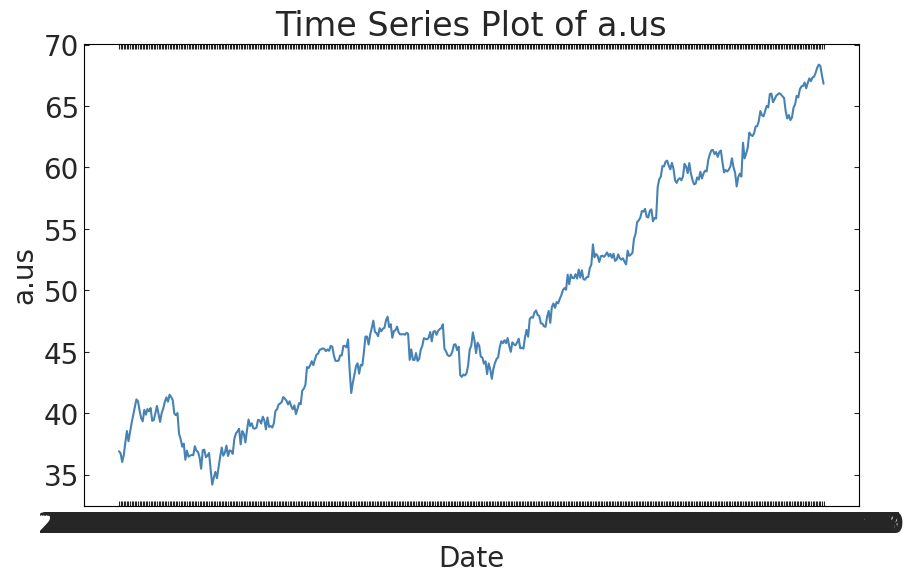

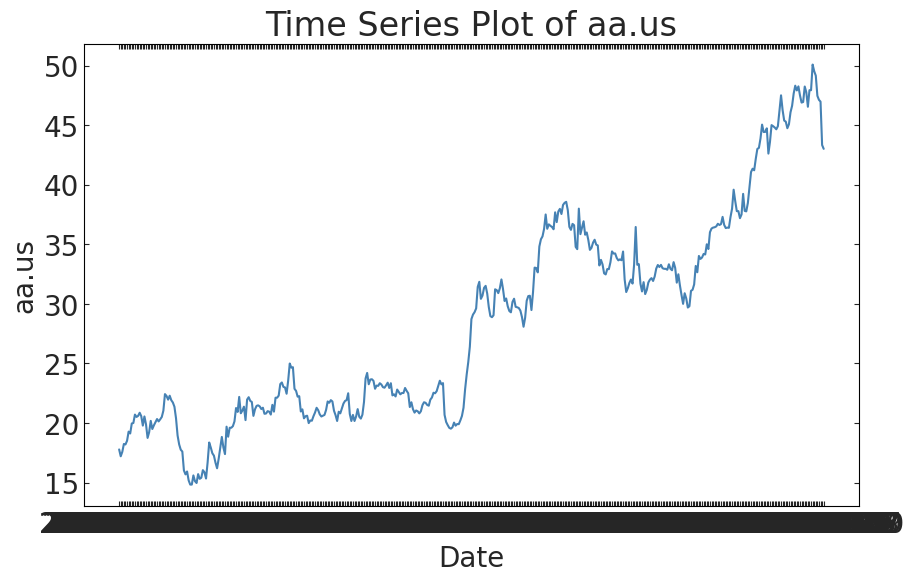

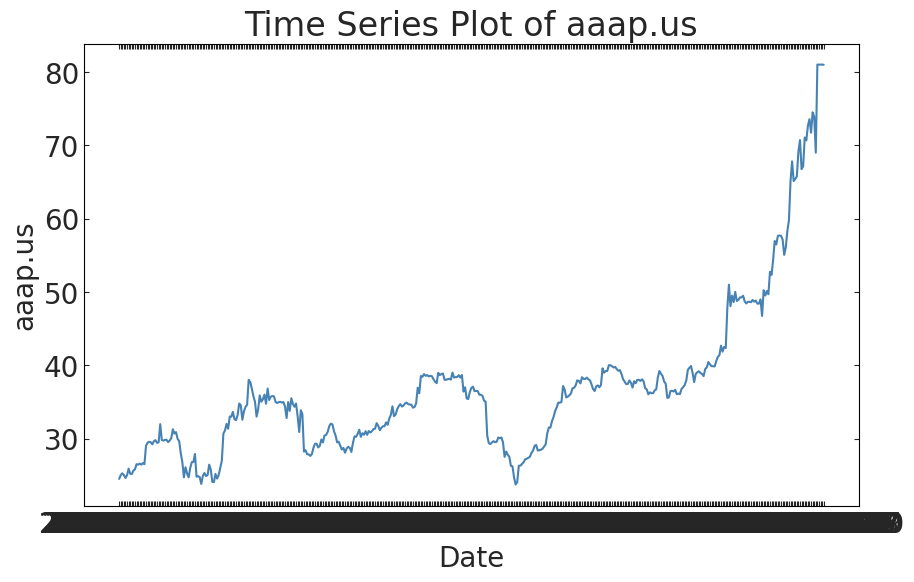

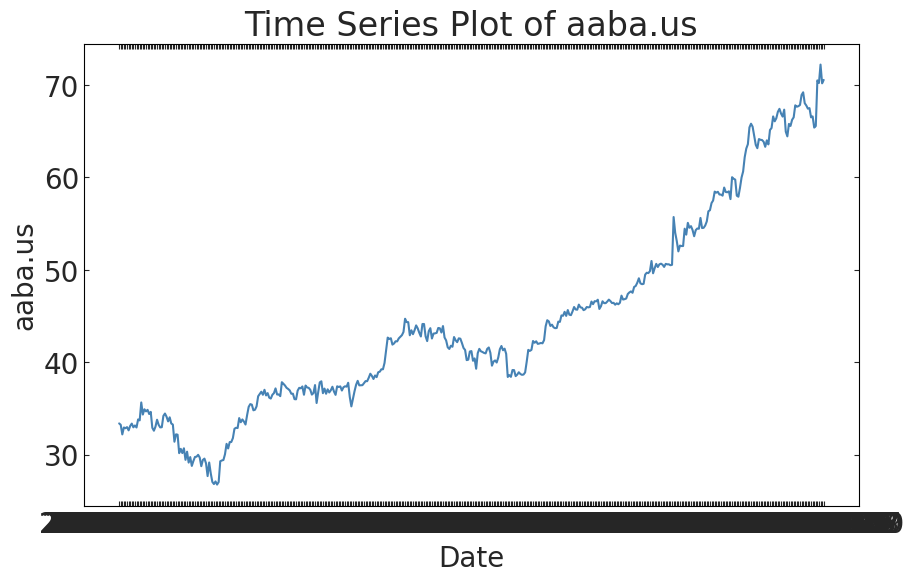

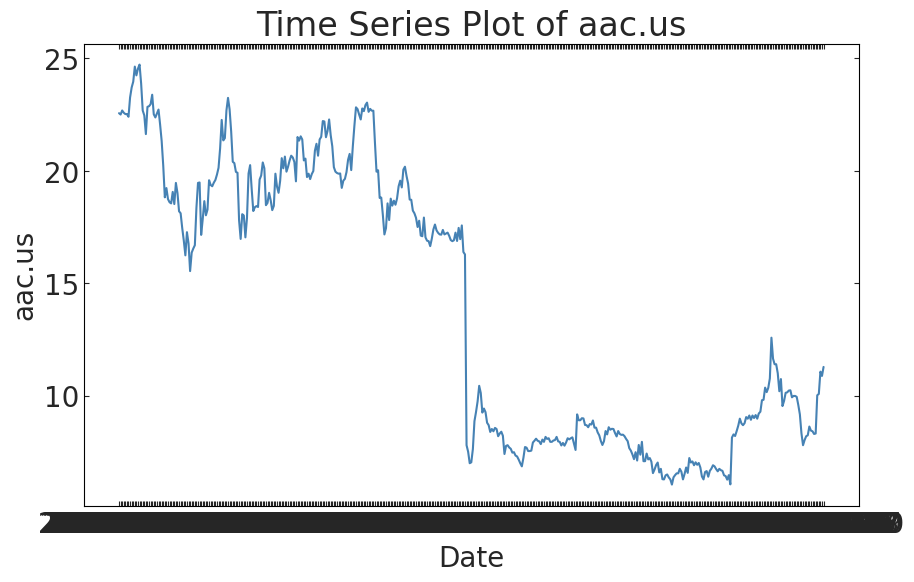

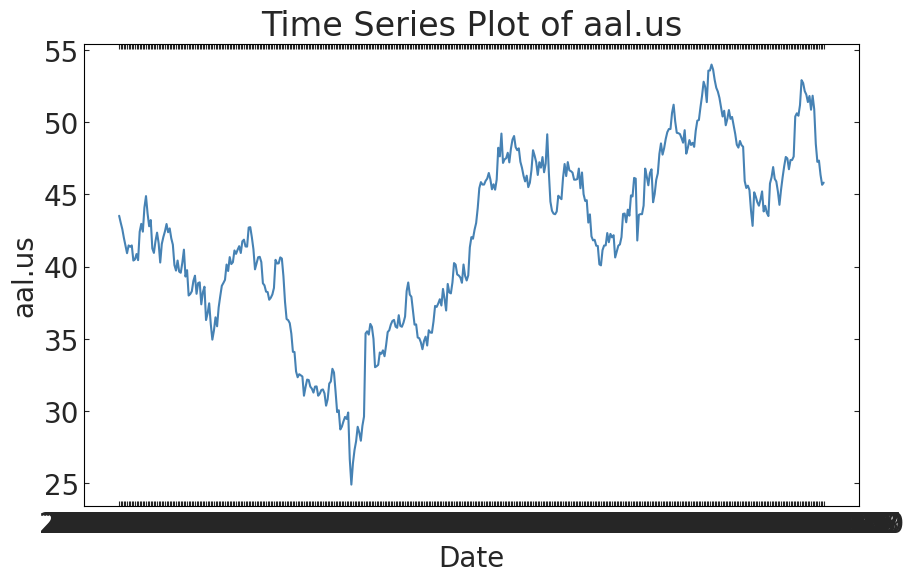

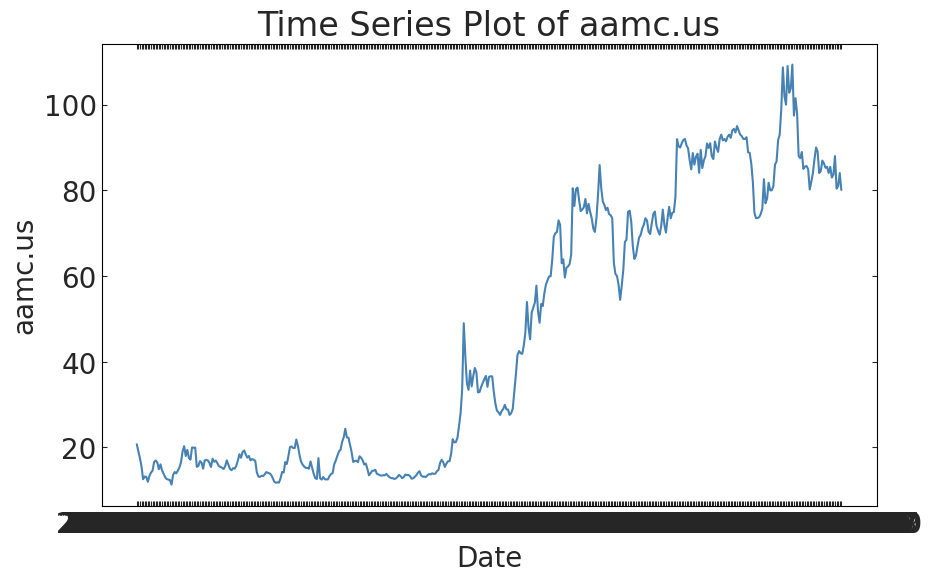

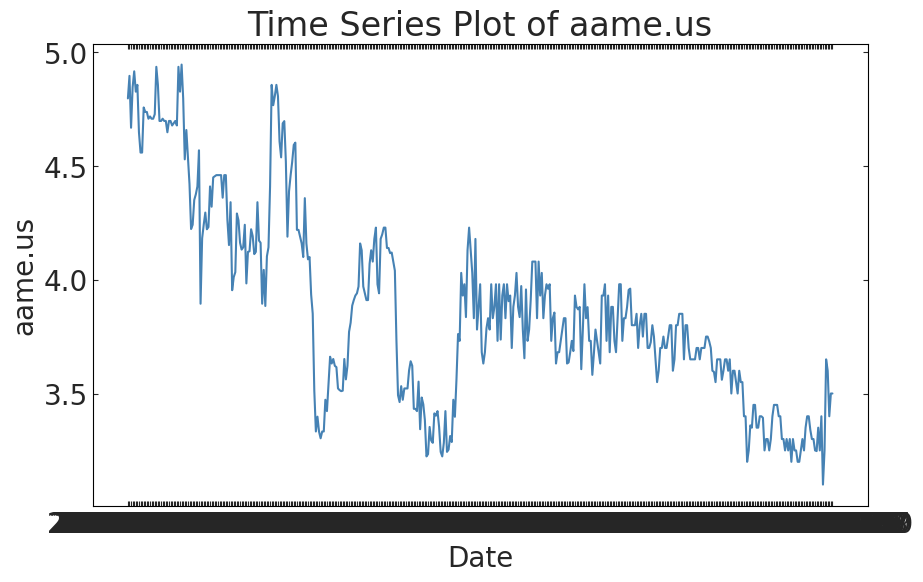

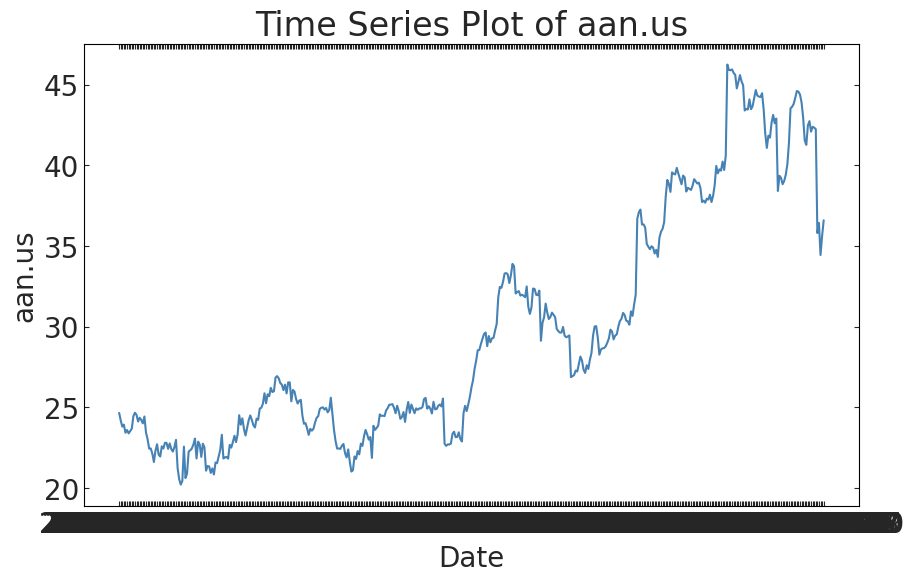

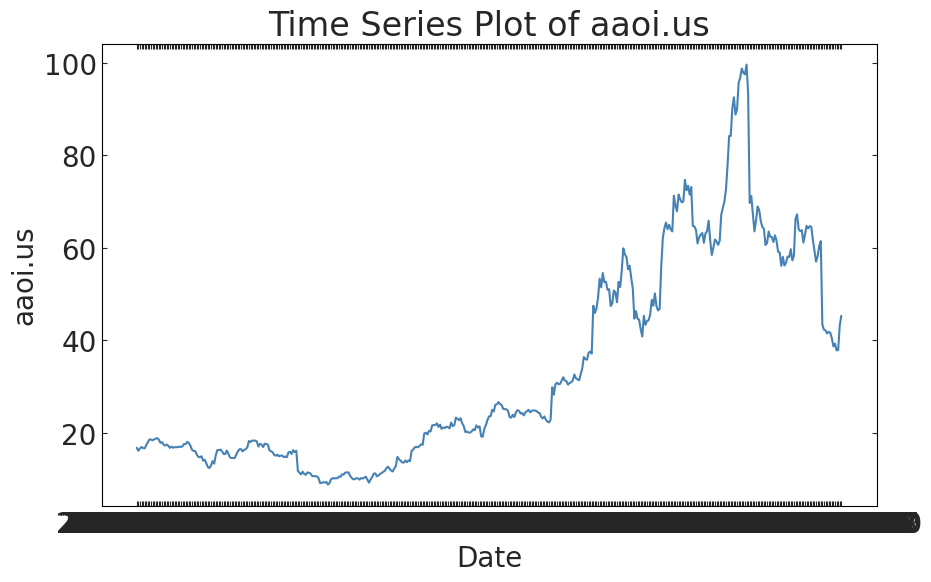

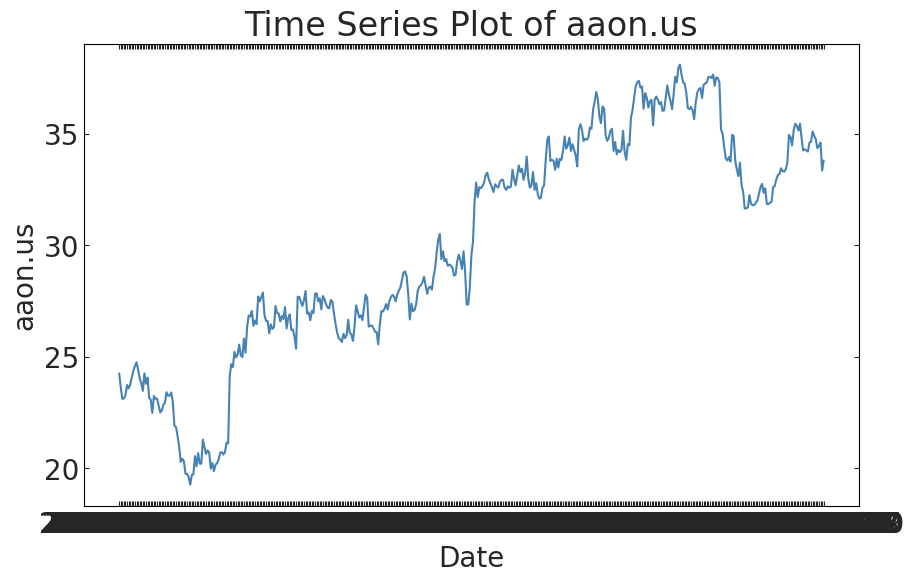

In [75]:
for c in tss.columns:
    pl.figure()
    pl.plot(tss[c])
    pl.xlabel("Date")
    pl.ylabel(c)
    pl.title(f"Time Series Plot of {c}")
    pl.show()


Figure 1: These are plots of the prices of all 11 stocks in this dataset from 2015 to 2017. here we can notice that there are clear trends and seasonalities in all the plots. AAME and AAC appear to be the only stocks with any downward trend, the rest of the stocks exhibit upward trends.

### visualizing correlations

use ```pandas.plotting.scatter_matrix```  to look at the relationship between lightcurves

plot the pairwise correlation as a heatmap using ```pl.imshow()```. You can access the pairwise correlation with the dataframe method ```df.corr()```

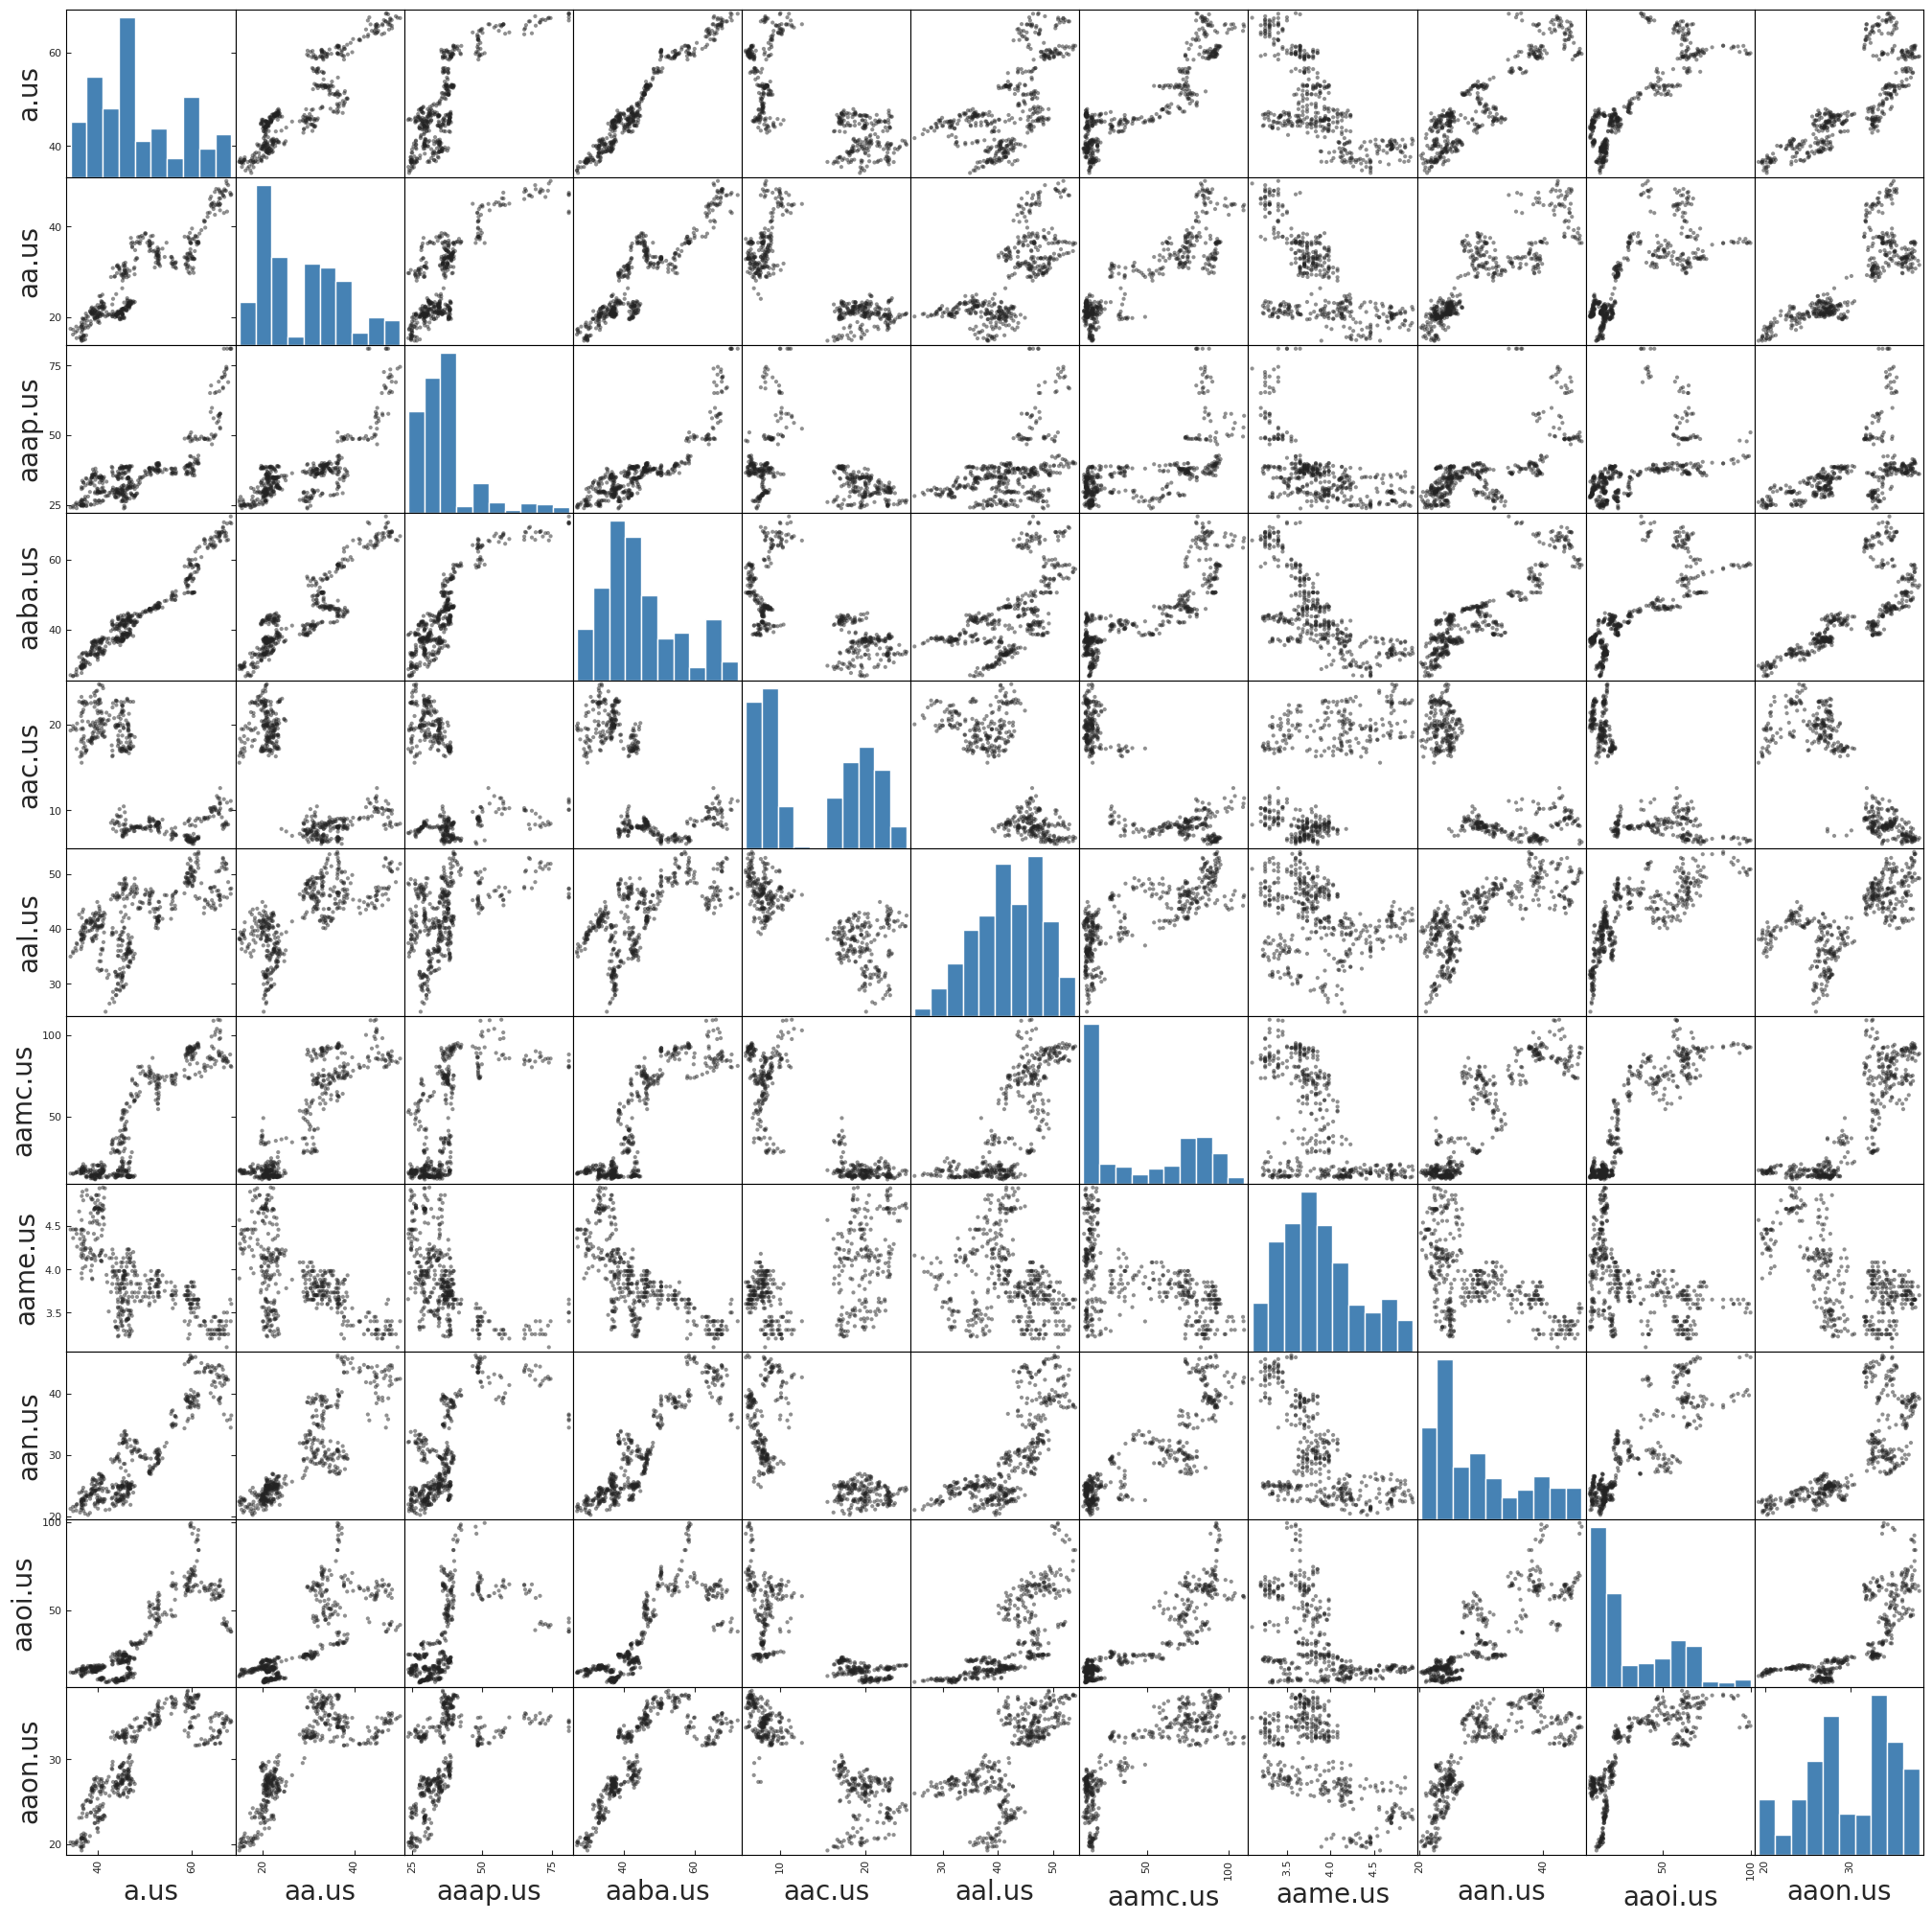

In [76]:
scatter_matrix(tss, figsize=(25,25), color="#222222");

Fig 2: WRITE A CAPTION

In [77]:
print("Correlation matrix of 2015-2017 stock values")
tss.corr()

Correlation matrix of 2015-2017 stock values


a.us     aa.us   aaap.us   aaba.us    aac.us    aal.us   aamc.us  \
a.us     1.000000  0.902139  0.800310  0.973457 -0.721867  0.621041  0.897263   
aa.us    0.902139  1.000000  0.776600  0.904210 -0.791137  0.713229  0.893952   
aaap.us  0.800310  0.776600  1.000000  0.872134 -0.423021  0.451520  0.621329   
aaba.us  0.973457  0.904210  0.872134  1.000000 -0.670578  0.612989  0.849972   
aac.us  -0.721867 -0.791137 -0.423021 -0.670578  1.000000 -0.785248 -0.868936   
aal.us   0.621041  0.713229  0.451520  0.612989 -0.785248  1.000000  0.780517   
aamc.us  0.897263  0.893952  0.621329  0.849972 -0.868936  0.780517  1.000000   
aame.us -0.699609 -0.606774 -0.573976 -0.709023  0.510986 -0.219258 -0.544740   
aan.us   0.905395  0.873520  0.696179  0.903785 -0.765267  0.756808  0.881631   
aaoi.us  0.851239  0.766459  0.560427  0.809059 -0.780147  0.746505  0.904166   
aaon.us  0.809409  0.809966  0.503524  0.755263 -0.876358  0.671816  0.853182   

          aame.us    aan.us   aaoi.us   aaon.us  
a.us    -0.699609  0.905395  0.851239  0.809409  
aa.us   -0.606774  0.873520  0.766459  0.809966  
aaap.us -0.573976  0.696179  0.560427  0.503524  
aaba.us -0.709023  0.903785  0.809059  0.755263  
aac.us   0.510986 -0.765267 -0.780147 -0.876358  
aal.us  -0.219258  0.756808  0.746505  0.671816  
aamc.us -0.544740  0.881631  0.904166  0.853182  
aame.us  1.000000 -0.585002 -0.496371 -0.612453  
aan.us  -0.585002  1.000000  0.860847  0.765596  
aaoi.us -0.496371  0.860847  1.000000  0.780400  
aaon.us -0.612453  0.765596  0.780400  1.000000

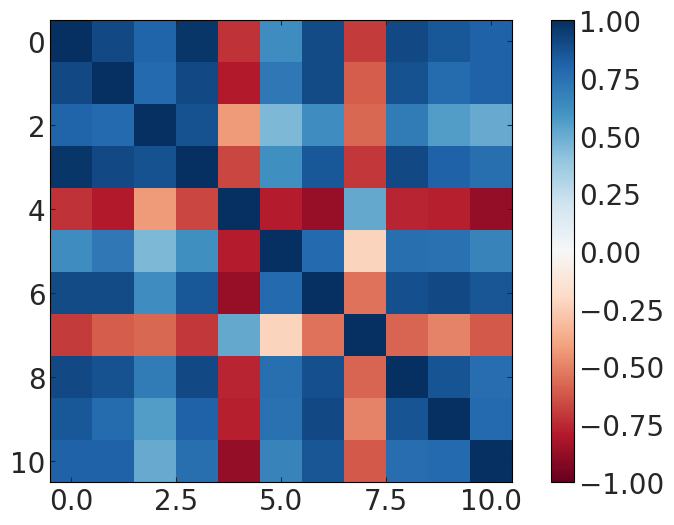

In [78]:
#Show the correlation as a heatmap
pl.imshow(tss.corr(), cmap="RdBu", vmin=-1, vmax=1)
pl.colorbar()

Fig 3: WRITE A CAPTION

# TASK 3: test each time series for stationarity

## this will allow you to choose the parameter i in the ARIMA model: `i=0` for stationary time series, `i=1` for non stationary time series

The AD fuller test implementation which we saw in class is here
https://github.com/fedhere/MLTSA_FBianco/blob/main/CodeExamples/ARMA/testingARMA_ARIMA.ipynb

## testing for stationarity
test if each of these time series is stationary using the AD fuller test using `statsmodels.api.tsa.stattools.adfuller()`

```
for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])
```

Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

In [79]:
threshold = 0.05
stationary = []
non_stationary = []
print ("Stationarity results from the AD Fuller test at a p-value of 0.05")
for c in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])
    p = sm.tsa.stattools.adfuller(tss[c])[1]
    if p < threshold:
        print(c, "is stationary")
        stationary.append(c)
    else:
        print(c, "is not stationary")
        non_stationary.append(c) # use the ADfuller test that we tried in class - that notebook is here  https://github.com/fedhere/MLTSA_FBianco/blob/main/CodeExamples/ARMA/testingARMA_ARIMA.ipynb

Stationarity results from the AD Fuller test at a p-value of 0.05
a.us is not stationary
aa.us is not stationary
aaap.us is not stationary
aaba.us is not stationary
aac.us is not stationary
aal.us is not stationary
aamc.us is not stationary
aame.us is stationary
aan.us is not stationary
aaoi.us is not stationary
aaon.us is not stationary


NOTE: keep track of which time series is stationary and which one is not - when you model with ARIMA you can set the second parameter to 0 if it is stationary

# TASK 4: Inspect the partial autocorrelation with plots -
## this will help you choose the value of the parameter p in the ARIMA model: `p=N` where N is the largest statistically significant lag in the partial autocorrelation


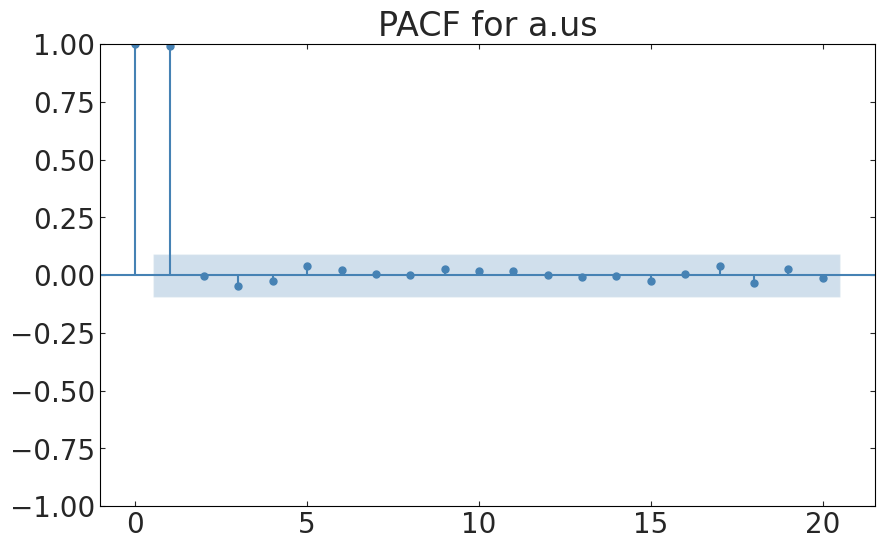

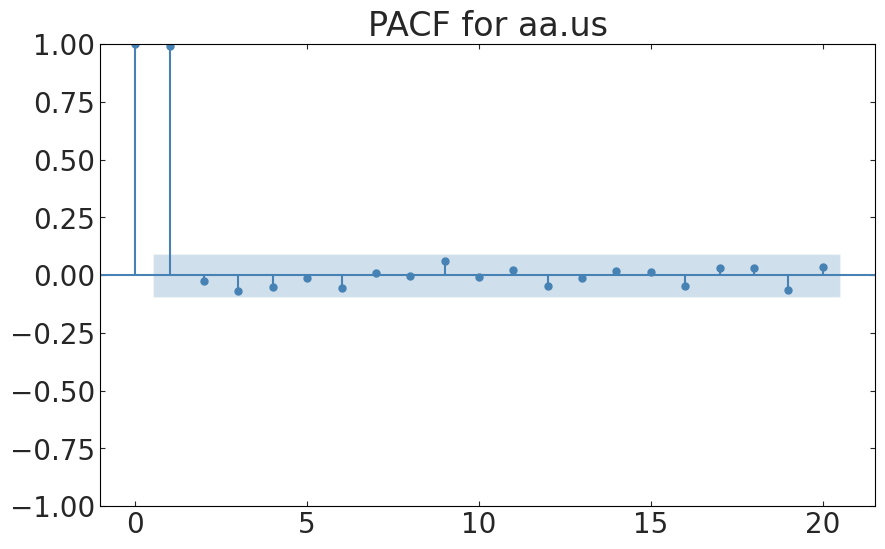

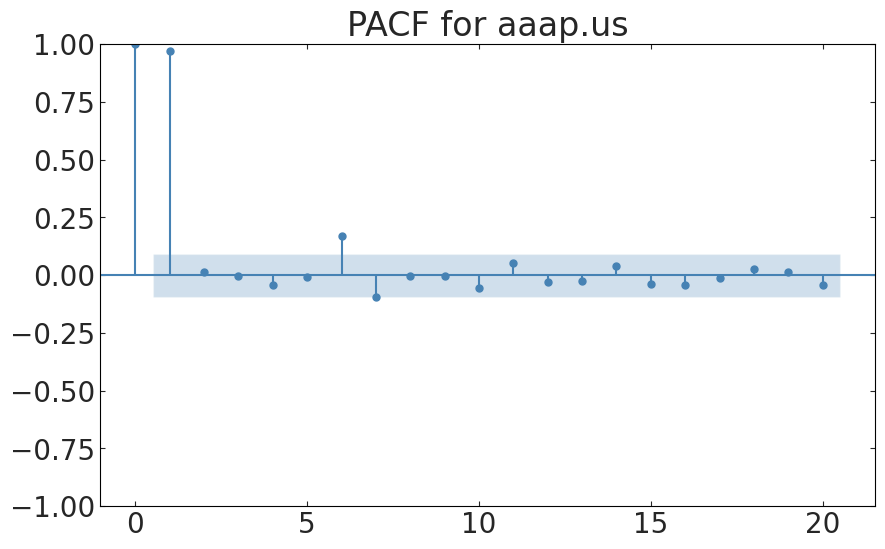

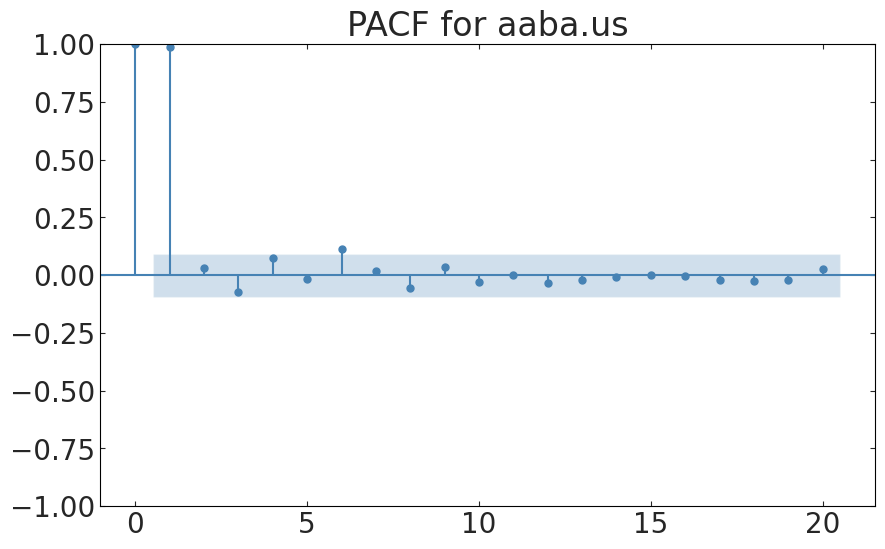

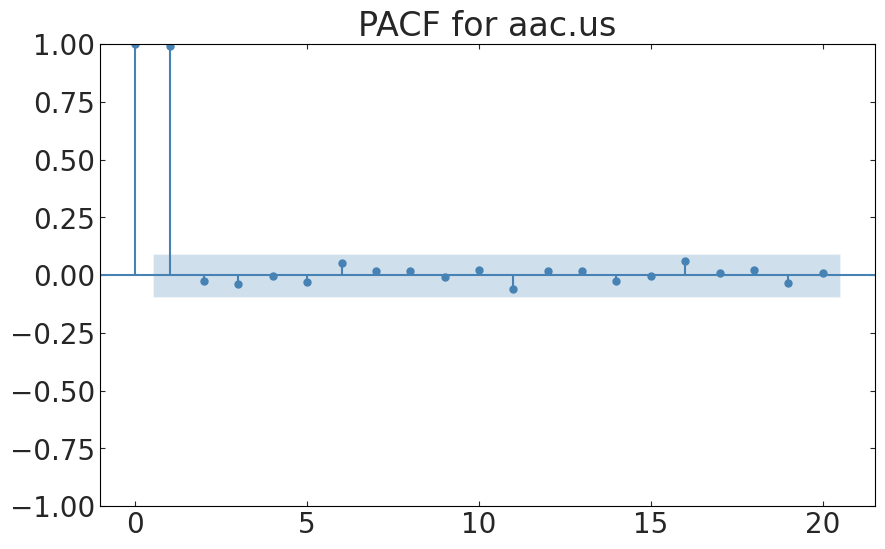

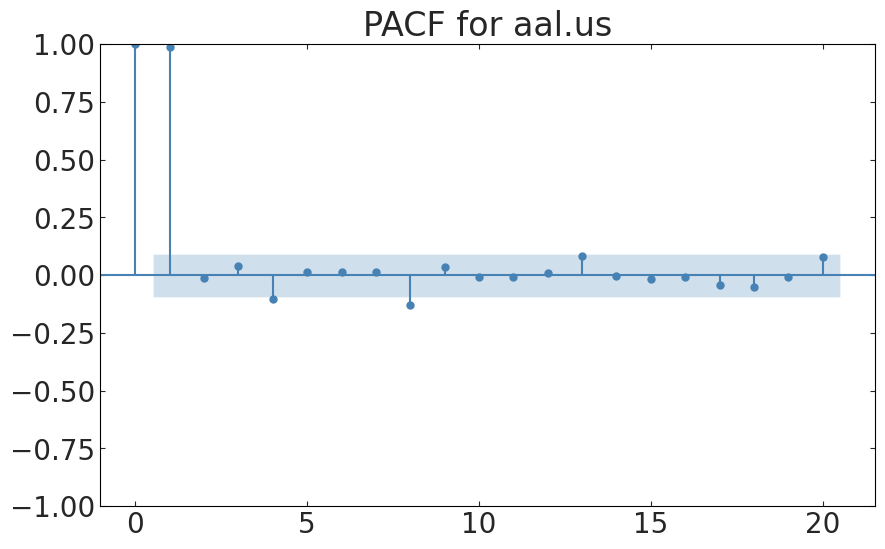

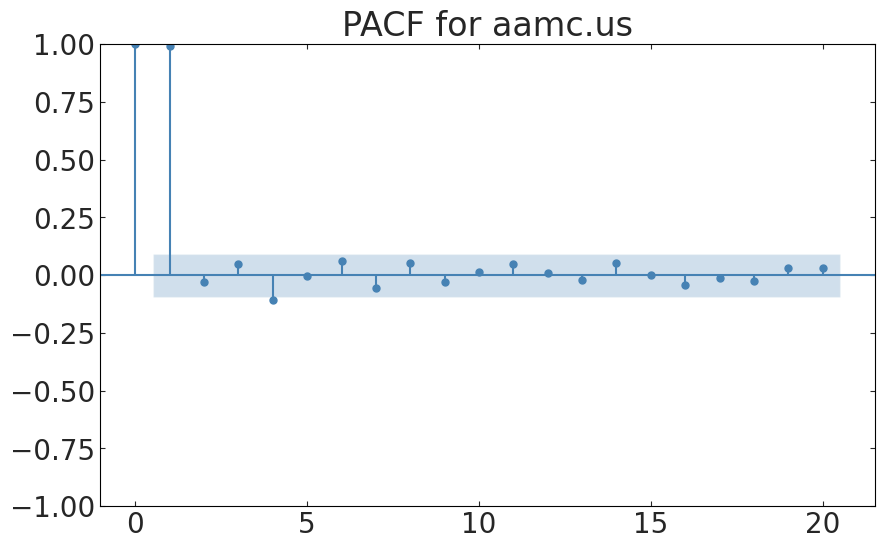

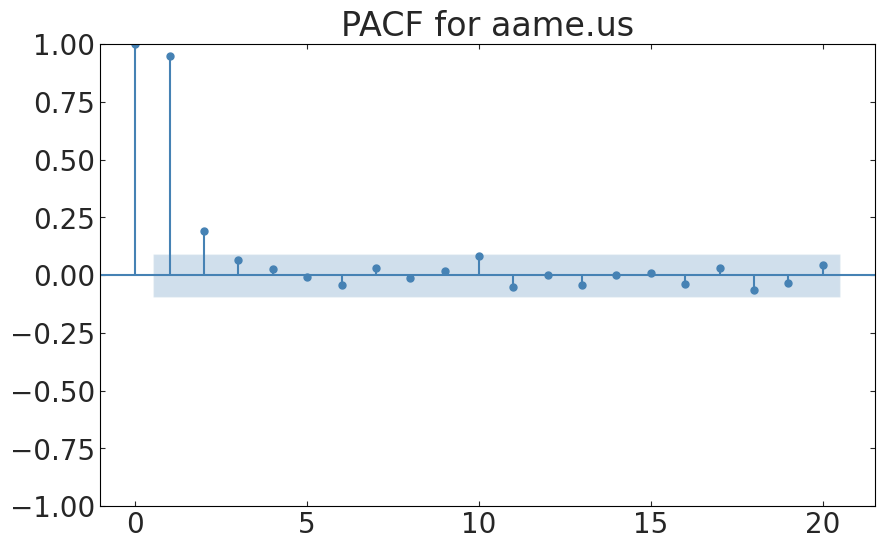

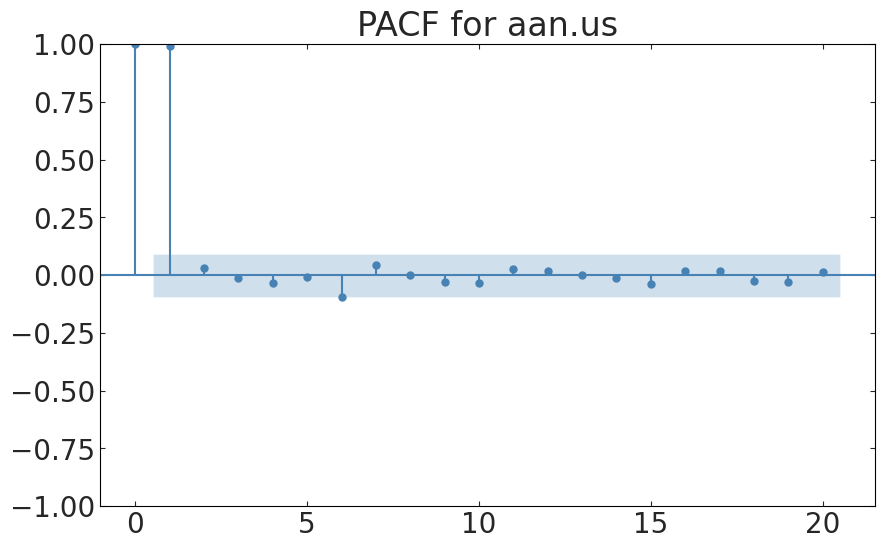

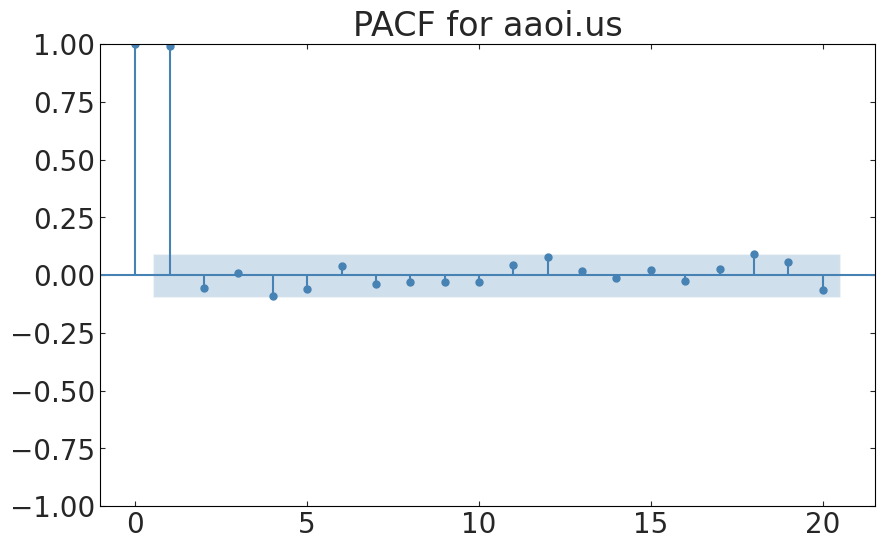

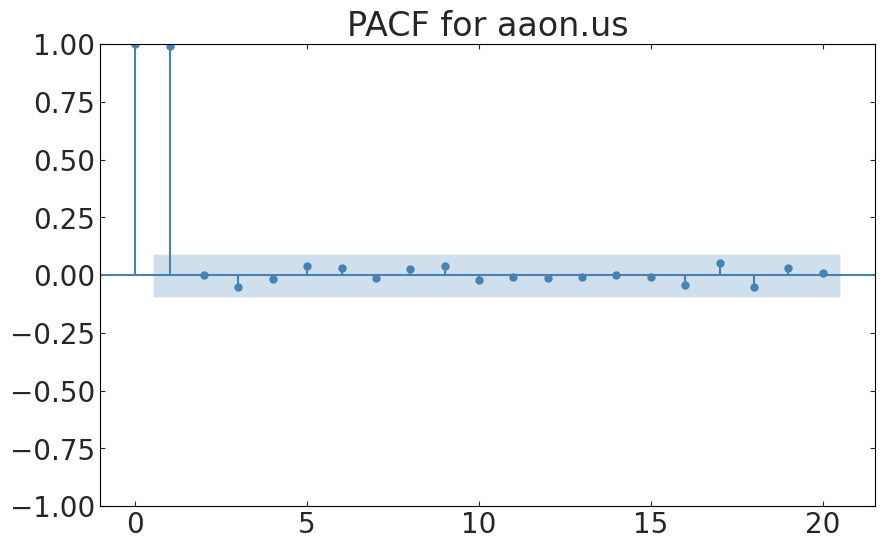

In [81]:
for c in tss.columns:
    sm.graphics.tsa.plot_pacf(tss[c], lags=20);
    pl.title("PACF for " + c)
    pl.show()

FIG 4: WRITE A CAPTION (for each time series make a figure)

In [93]:
# Make a list of highest significant lags.

highest_lags = []
for c in tss.columns:
    pacf = sm.tsa.pacf(tss[c], nlags=20)  # Calculate PACF up to 20 lags
    significant_lags = np.where(np.abs(pacf) > 1.96 / np.sqrt(len(tss)))[0] # Find statistically significant lags at 95% confidence level
    highest_lag = np.max(significant_lags) if significant_lags.size > 0 else 0
    highest_lags.append(highest_lag)

# TASK 5: fit an ARIMA model to each time series
- look here for how to use the statsmodels ARIMA function https://www.geeksforgeeks.org/arma-time-series-model/
- the ARIMA function has 3 parameters: (p,i,q) see slide https://slides.com/d/EfsBk3o/live#/12; choose the values of _p_ according to your pacf plot and _i_ according to your stationarity analysis. _q_ is harder to guess... pick whatever you want for now

For each time series, use the all but the last 60 points for training and show the prediction based on the last 60 points



In [94]:
# to run the model for 1 column:

arma_models = []
model_fits = []

for index, column_name in enumerate(tss.columns):
    print(column_name)
    N_test = 60
    p = highest_lags[index]
    i = 0 if column_name == "aame.us" else 1
    q = 3

    arma_models.append(sm.tsa.ARIMA(tss.iloc[:-60][column_name], order=(p, i, q)))
    model_fits.append(arma_models[-1].fit())
    print(model_fits[-1].summary())

a.us
                               SARIMAX Results                                
Dep. Variable:                   a.us   No. Observations:                  387
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -361.580
Date:                Tue, 04 Mar 2025   AIC                            733.161
Time:                        02:05:05   BIC                            752.940
Sample:                             0   HQIC                           741.004
                                - 387                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6588      0.223     -2.953      0.003      -1.096      -0.222
ma.L1          0.5917      0.224      2.638      0.008       0.152       1.031
ma.L2         -0.0314      0.063     -0.496    

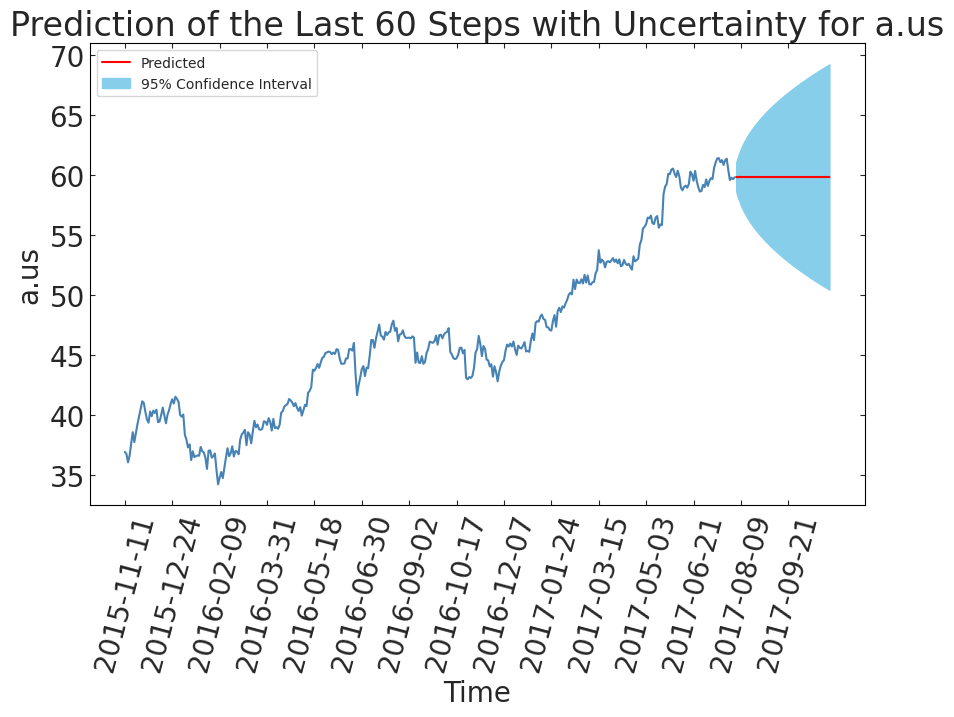

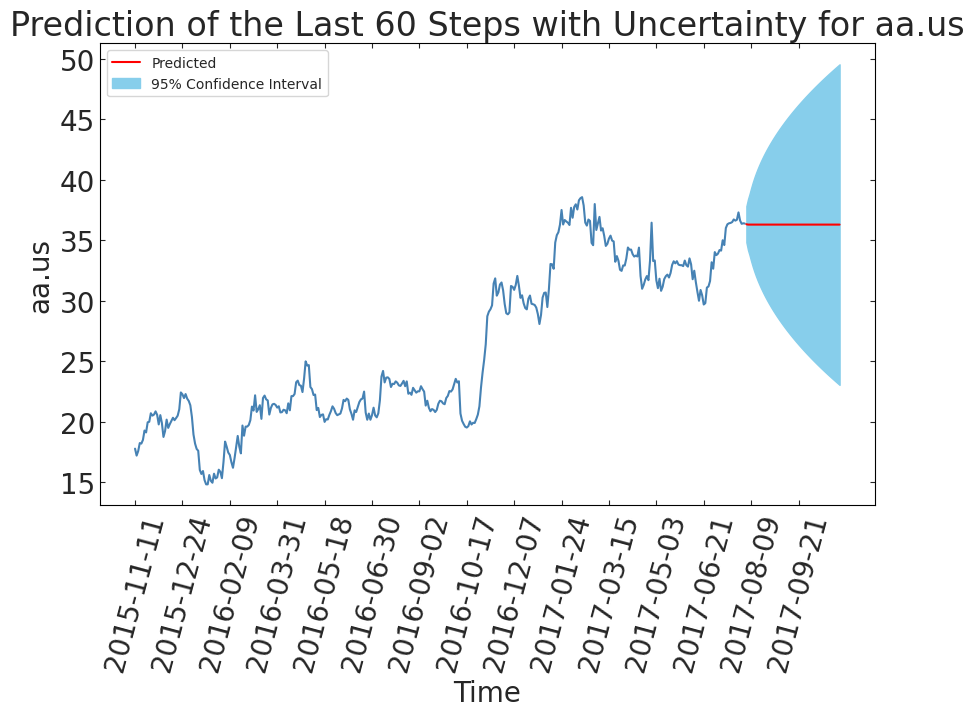

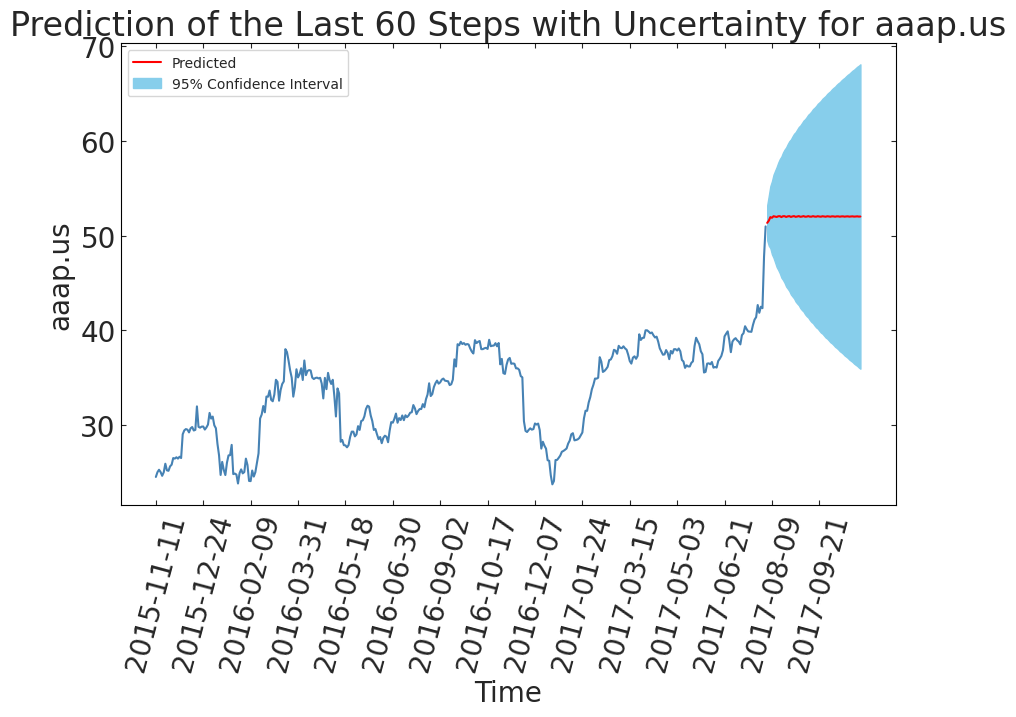

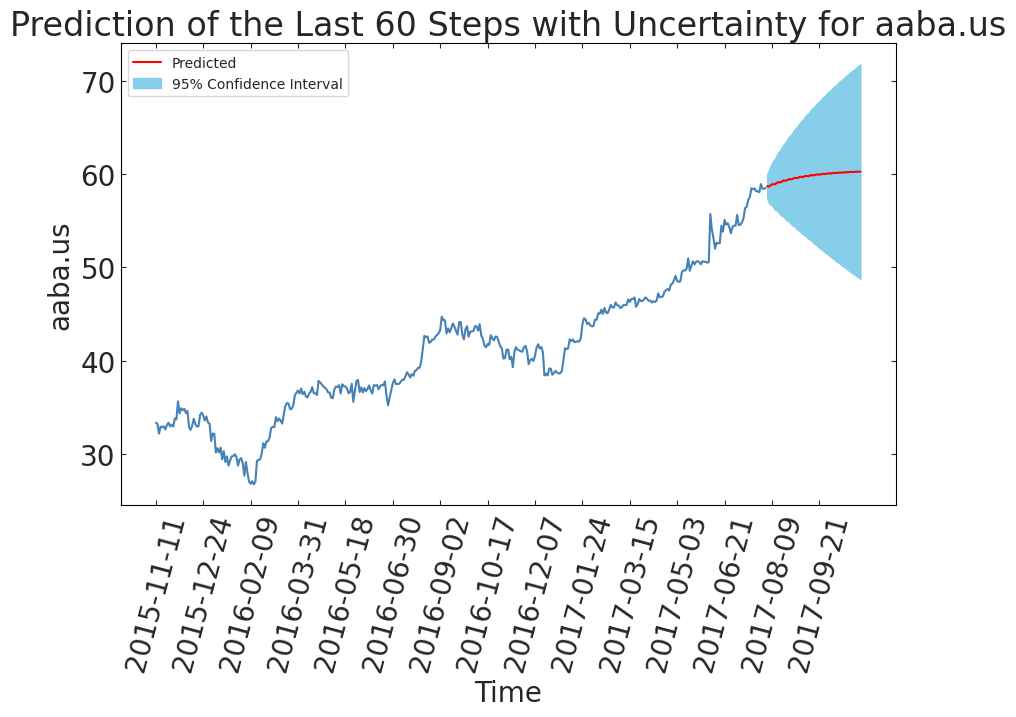

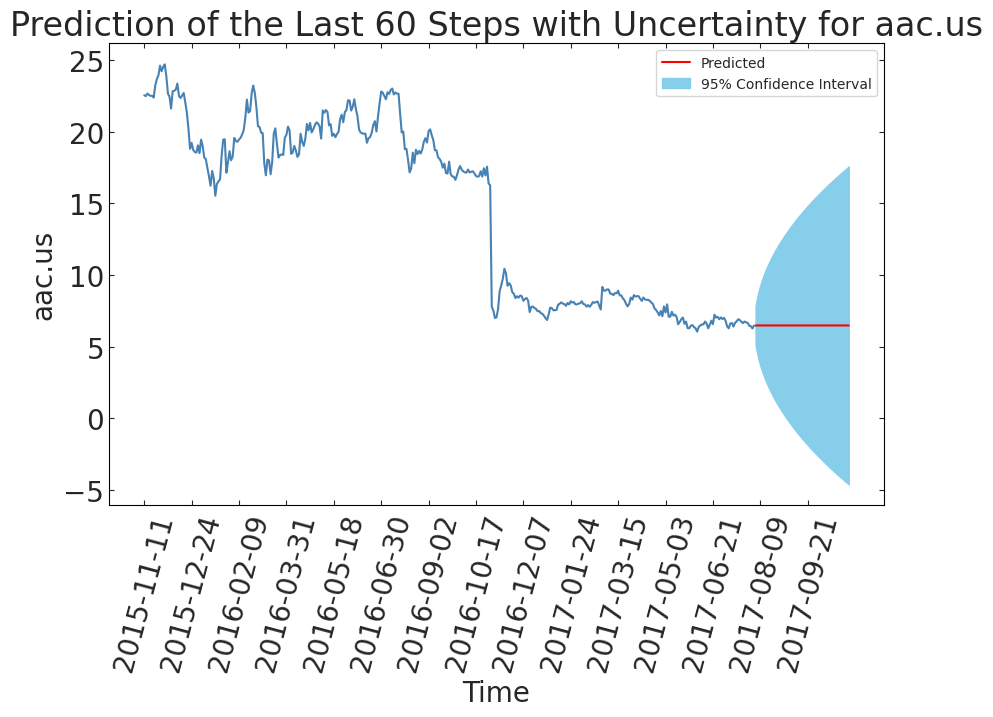

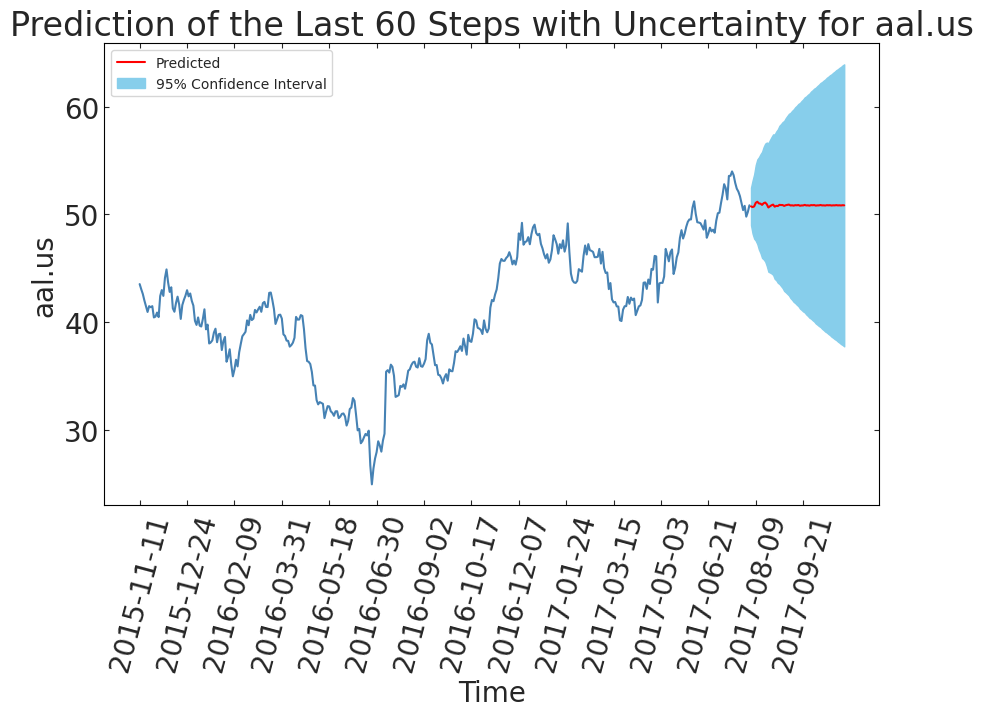

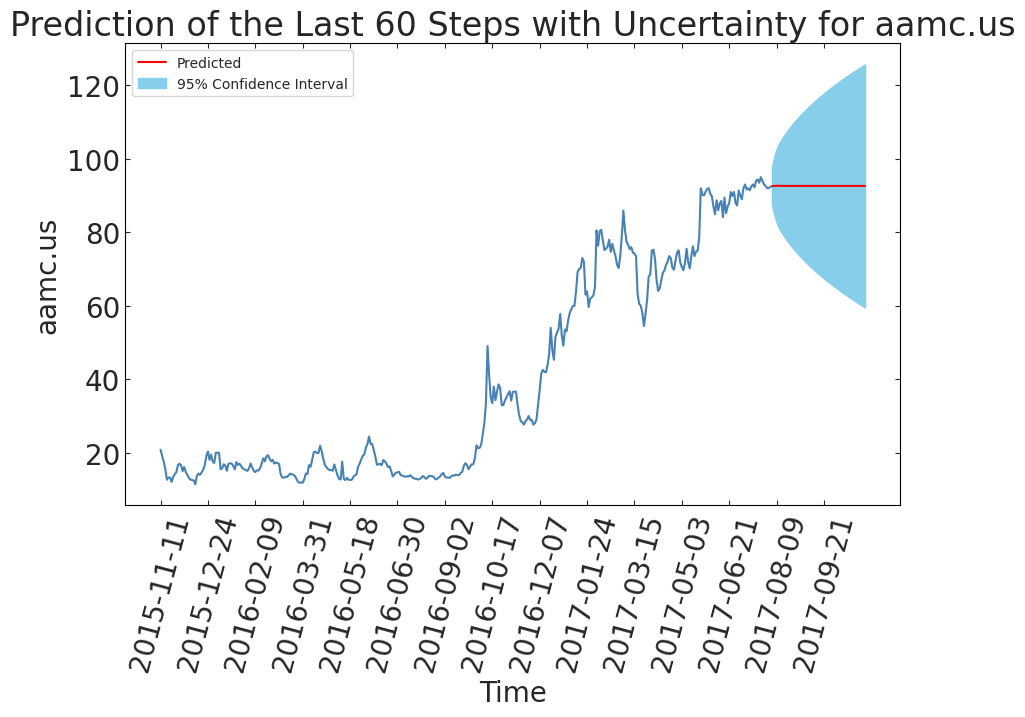

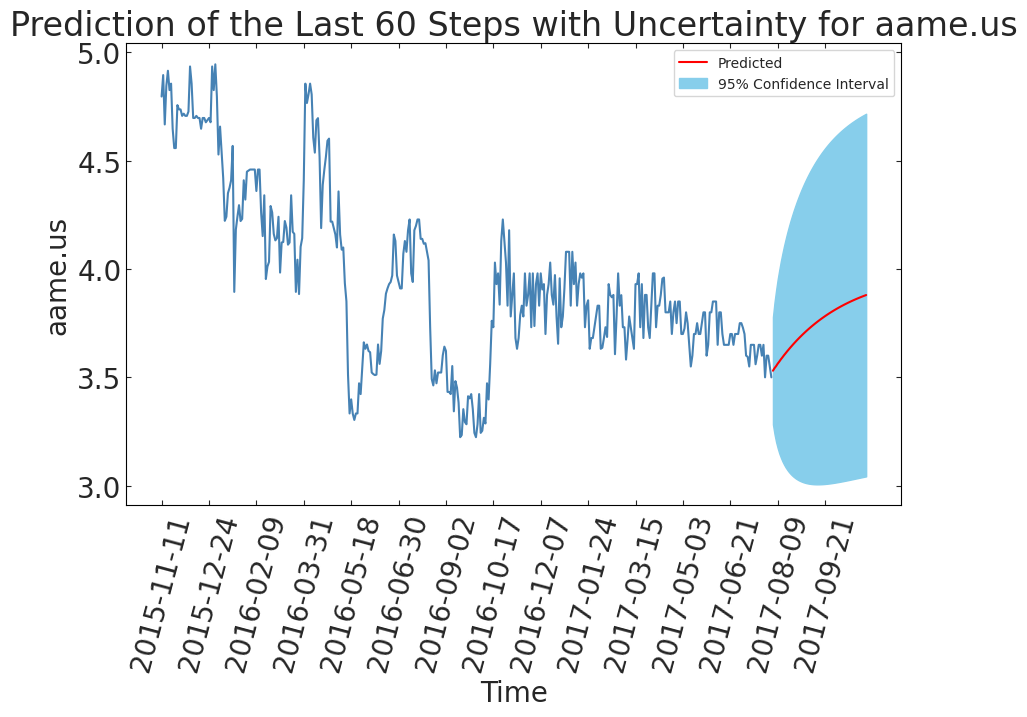

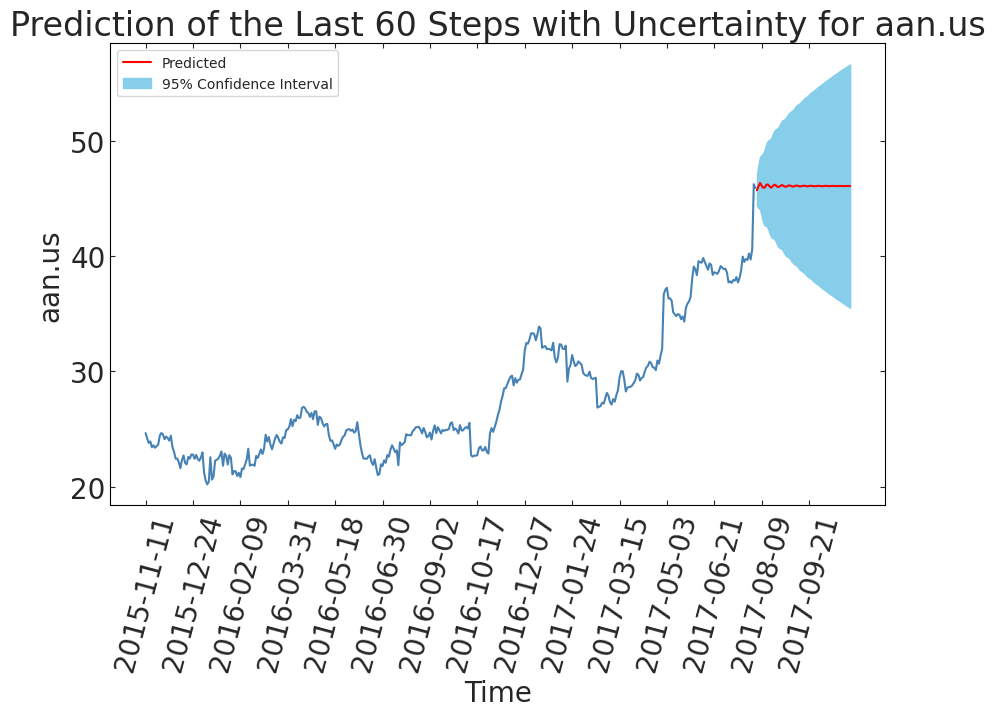

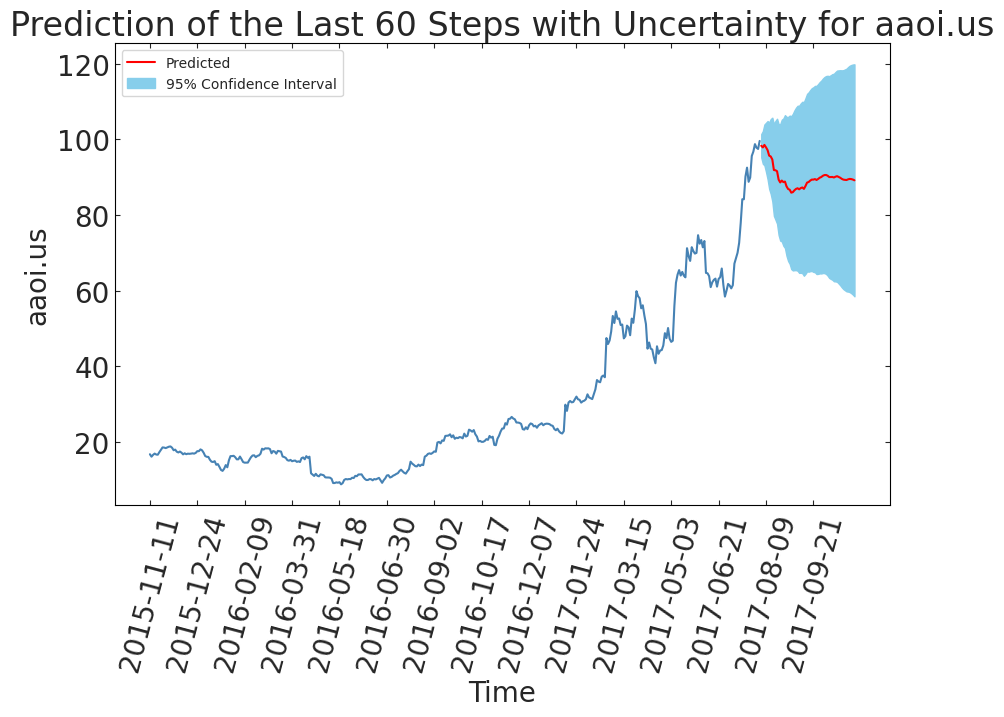

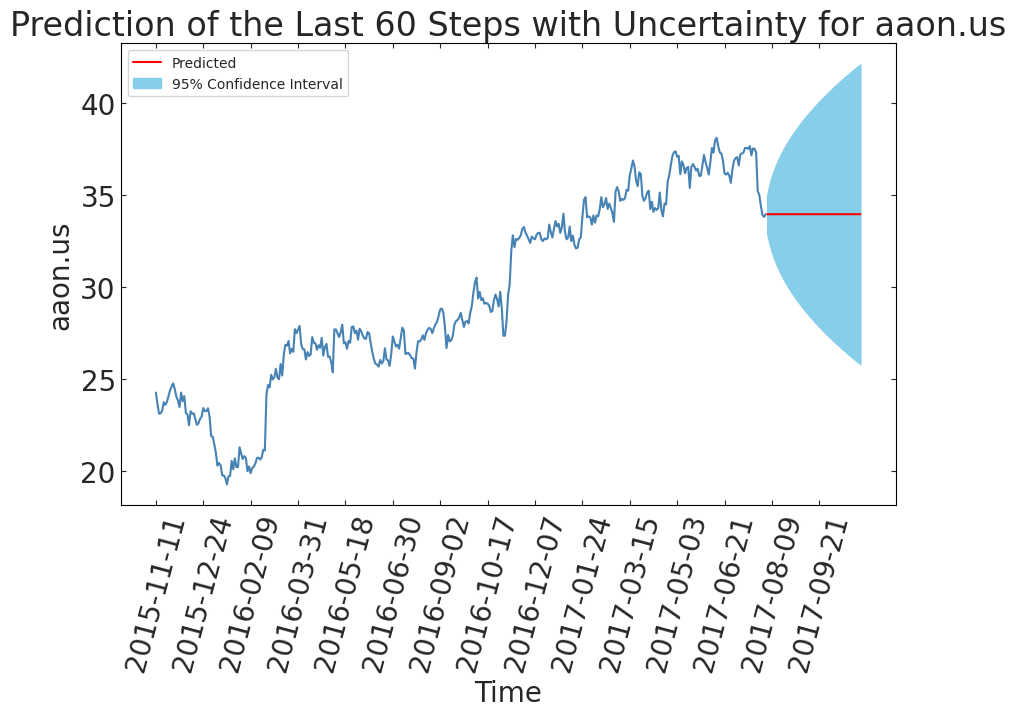

In [95]:
for i in range(len(tss.columns)):
    plt.plot(tss.iloc[:-60].index, tss.iloc[:-60][tss.columns[i]])#, rot=75, lw=2)

    forecast = model_fits[i].get_forecast(60)
    yhat = forecast.predicted_mean
    yhat_conf_int = forecast.conf_int(alpha=0.05)

    # Plot the predictions with uncertainty
    plt.plot(tss.iloc[-60:].index, yhat, label="Predicted", color="red")
    plt.fill_between(tss.iloc[-60:].index,  yhat_conf_int["lower " + tss.columns[i]],
                    yhat_conf_int["upper " + tss.columns[i]],
                    color="skyblue",
                    label="95% Confidence Interval")
    plt.xticks(tss.index[::30], rotation=75)
    plt.xlabel("Time")
    plt.ylabel(f"{tss.columns[i]}")
    plt.title(f"Prediction of the Last 60 Steps with Uncertainty for {tss.columns[i]}")
    plt.legend(fontsize=10)
    plt.show()

FIG 5: Above are plots of each of the time series with the ARIMA predictions on the last 60 points of the dataset. The main difference between these plots and Figure 1 is in the far right. Here, the red line represents the predicted values, and the shaded blue region is the 95% confidence interval surrounding those predictions. In every case, the confidence interval fans out, which is to be expected since the uncertainty of a certain prediction is a way accumulation of uncertainty in previous predictions. Thus, the uncertainty in our predictions increases rapidly the further away we go from the known data.